<a href="https://colab.research.google.com/github/jarodchristiansen/Machine-Learning-Deep-Learning/blob/master/Time_Series_Forecasting_Financial_Instruments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
!pip install yfinance
!pip install pycoingecko
!pip install fredapi
!pip install keras-tuner --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


## Fetch Data

Uses `fetch_asset_data` to create a dataframe from asset data collected using yahoo finance API.

In [9]:
import yfinance as yf
import pandas as pd

# Function to fetch financial asset data
def fetch_asset_data(ticker, start_date, end_date):
    """
    Fetch historical data for a given asset using its ticker symbol.
    :param ticker: str, asset ticker symbol (e.g., 'AAPL', 'BTC-USD')
    :param start_date: str, start date in format 'YYYY-MM-DD'
    :param end_date: str, end date in format 'YYYY-MM-DD'
    :return: DataFrame with historical data
    """
    asset = yf.Ticker(ticker)
    data = asset.history(start=start_date, end=end_date)
    return data



# You can easily change the ticker symbol to get different assets:

# Gold: 'GC=F'
# Apple Stock: 'AAPL'
# US Treasuries (10 year): '^TNX'

# Example usage
ticker = 'BTC-USD'  # Bitcoin example
start_date = '2014-09-17'
end_date = '2024-10-13'
btc_data = fetch_asset_data(ticker, start_date, end_date)

# Display first few rows
btc_data


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-08 00:00:00+00:00,62221.644531,63174.304688,61843.562500,62131.968750,28134475157,0.0,0.0
2024-10-09 00:00:00+00:00,62131.726562,62508.835938,60314.613281,60582.101562,27670982363,0.0,0.0
2024-10-10 00:00:00+00:00,60581.929688,61236.722656,58895.207031,60274.500000,30452813570,0.0,0.0


In [12]:
# Gold: 'GC=F'
# Apple Stock: 'AAPL'
# US Treasuries (10 year): '^TNX'

# Example usage
ticker = 'GC=F'  # Bitcoin example
start_date = '2014-09-17'
end_date = '2024-10-13'
gold_data = fetch_asset_data(ticker, start_date, end_date)

# Display first few rows
gold_data


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00-04:00,1236.199951,1236.199951,1221.900024,1234.400024,10,0.0,0.0
2014-09-18 00:00:00-04:00,1216.199951,1225.699951,1216.199951,1225.699951,5,0.0,0.0
2014-09-19 00:00:00-04:00,1218.300049,1218.300049,1215.300049,1215.300049,4,0.0,0.0
2014-09-22 00:00:00-04:00,1214.900024,1216.800049,1212.400024,1216.800049,7,0.0,0.0
2014-09-23 00:00:00-04:00,1221.000000,1221.000000,1221.000000,1221.000000,5,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-07 00:00:00-04:00,2648.699951,2657.399902,2639.000000,2644.800049,284,0.0,0.0
2024-10-08 00:00:00-04:00,2639.000000,2639.000000,2609.300049,2615.000000,687,0.0,0.0
2024-10-09 00:00:00-04:00,2603.000000,2607.699951,2603.000000,2606.000000,152,0.0,0.0


In [11]:
from fredapi import Fred
from google.colab import userdata


fred_key = userdata.get('fred_api_key')

fred = Fred(api_key=fred_key)

def fetch_macro_data(series_id, start_date, end_date):
    data = fred.get_series(series_id, observation_start=start_date, observation_end=end_date)
    df = pd.DataFrame(data, columns=[series_id])
    df.reset_index(inplace=True)
    df.columns = ['Date', series_id]
    return df

In [15]:
# Example of fetching M2 data
m2_data = fetch_macro_data('M2SL', '2014-09-17', '2024-10-13')
print(m2_data.head())

# Interest rates
interest_rates_data = fetch_macro_data('DFF', '2014-09-17', '2024-10-13')
print(interest_rates_data.head())

# Bond yields
bond_yield_data = fetch_macro_data('GS10', '2014-09-17', '2024-10-13')
print(bond_yield_data.head())


        Date     M2SL
0 2014-09-01  11493.7
1 2014-10-01  11568.1
2 2014-11-01  11608.8
3 2014-12-01  11692.0
4 2015-01-01  11764.6
        Date   DFF
0 2014-09-17  0.09
1 2014-09-18  0.09
2 2014-09-19  0.09
3 2014-09-20  0.09
4 2014-09-21  0.09
        Date  GS10
0 2014-09-01  2.53
1 2014-10-01  2.30
2 2014-11-01  2.33
3 2014-12-01  2.21
4 2015-01-01  1.88


## Merge Datasets After Fetching

In [17]:
# Convert Date column to datetime without timezone
btc_data.index = pd.to_datetime(btc_data.index).tz_localize(None)
gold_data.index = pd.to_datetime(gold_data.index).tz_localize(None)
m2_data['Date'] = pd.to_datetime(m2_data['Date'])
interest_rates_data['Date'] = pd.to_datetime(interest_rates_data['Date'])
bond_yield_data['Date'] = pd.to_datetime(bond_yield_data['Date'])

# resolves naming conflicts in any common dataframes
btc_data = btc_data.add_prefix('BTC_')
gold_data = gold_data.add_prefix('GOLD_')

# Reset index to ensure 'Date' is a column in both btc_data and gold_data
btc_data.reset_index(inplace=True)
gold_data.reset_index(inplace=True)



def merge_datasets(datasets):
    merged_df = datasets[0]
    for df in datasets[1:]:
        merged_df = pd.merge(merged_df, df, on='Date', how='outer')
    merged_df.fillna(method='ffill', inplace=True)  # Forward fill missing values
    merged_df.dropna(inplace=True)  # Drop rows with any remaining NaNs
    return merged_df


# Example usage
merged_data = merge_datasets([btc_data, gold_data, m2_data, interest_rates_data, bond_yield_data])
merged_data



<ipython-input-17-a0bc3aff64c5>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)  # Forward fill missing values


,Date,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume,BTC_Dividends,BTC_Stock Splits,GOLD_Open,GOLD_High,GOLD_Low,GOLD_Close,GOLD_Volume,GOLD_Dividends,GOLD_Stock Splits,M2SL,DFF,GS10
1,2014-09-17,465.864014,468.174011,452.421997,457.334015,2.105680e+07,0.0,0.0,1236.199951,1236.199951,1221.900024,1234.400024,10.0,0.0,0.0,11493.7,0.09,2.53
2,2014-09-18,456.859985,456.859985,413.104004,424.440002,3.448320e+07,0.0,0.0,1216.199951,1225.699951,1216.199951,1225.699951,5.0,0.0,0.0,11493.7,0.09,2.53
3,2014-09-19,424.102997,427.834991,384.532013,394.795990,3.791970e+07,0.0,0.0,1218.300049,1218.300049,1215.300049,1215.300049,4.0,0.0,0.0,11493.7,0.09,2.53
4,2014-09-20,394.673004,423.295990,389.882996,408.903992,3.686360e+07,0.0,0.0,1218.300049,1218.300049,1215.300049,1215.300049,4.0,0.0,0.0,11493.7,0.09,2.53
5,2014-09-21,408.084991,412.425995,393.181000,398.821014,2.658010e+07,0.0,0.0,1218.300049,1218.300049,1215.300049,1215.300049,4.0,0.0,0.0,11493.7,0.09,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,2024-10-08,62221.644531,63174.304688,61843.562500,62131.968750,2.813448e+10,0.0,0.0,2639.000000,2639.000000,2609.300049,2615.000000,687.0,0.0,0.0,21174.9,4.83,3.72
3676,2024-10-09,62131.726562,62508.835938,60314.613281,60582.101562,2.767098e+10,0.0,0.0,2603.000000,2607.699951,2603.000000,2606.000000,152.0,0.0,0.0,21174.9,4.83,3.72
3677,2024-10-10,60581.929688,61236.722656,58895.207031,60274.500000,3.045281e+10,0.0,0.0,2602.500000,2628.300049,2602.500000,2620.600098,320.0,0.0,0.0,21174.9,4.83,3.72
3678,2024-10-11,60275.460938,63400.871094,60046.125000,62445.089844,3.032714e+10,0.0,0.0,2647.399902,2679.000000,2645.300049,2674.199951,162627.0,0.0,0.0,21174.9,4.83,3.72


## Preprocess data after merging

In [18]:
def preprocess_data(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    # Handle missing values or outliers
    df.fillna(method='ffill', inplace=True)
    return df


In [19]:
cleaned_data = preprocess_data(merged_data)
cleaned_data


<ipython-input-18-f87a78b33c4f>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume,BTC_Dividends,BTC_Stock Splits,GOLD_Open,GOLD_High,GOLD_Low,GOLD_Close,GOLD_Volume,GOLD_Dividends,GOLD_Stock Splits,M2SL,DFF,GS10
Date,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,2.105680e+07,0.0,0.0,1236.199951,1236.199951,1221.900024,1234.400024,10.0,0.0,0.0,11493.7,0.09,2.53
2014-09-18,456.859985,456.859985,413.104004,424.440002,3.448320e+07,0.0,0.0,1216.199951,1225.699951,1216.199951,1225.699951,5.0,0.0,0.0,11493.7,0.09,2.53
2014-09-19,424.102997,427.834991,384.532013,394.795990,3.791970e+07,0.0,0.0,1218.300049,1218.300049,1215.300049,1215.300049,4.0,0.0,0.0,11493.7,0.09,2.53
2014-09-20,394.673004,423.295990,389.882996,408.903992,3.686360e+07,0.0,0.0,1218.300049,1218.300049,1215.300049,1215.300049,4.0,0.0,0.0,11493.7,0.09,2.53
2014-09-21,408.084991,412.425995,393.181000,398.821014,2.658010e+07,0.0,0.0,1218.300049,1218.300049,1215.300049,1215.300049,4.0,0.0,0.0,11493.7,0.09,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-08,62221.644531,63174.304688,61843.562500,62131.968750,2.813448e+10,0.0,0.0,2639.000000,2639.000000,2609.300049,2615.000000,687.0,0.0,0.0,21174.9,4.83,3.72
2024-10-09,62131.726562,62508.835938,60314.613281,60582.101562,2.767098e+10,0.0,0.0,2603.000000,2607.699951,2603.000000,2606.000000,152.0,0.0,0.0,21174.9,4.83,3.72
2024-10-10,60581.929688,61236.722656,58895.207031,60274.500000,3.045281e+10,0.0,0.0,2602.500000,2628.300049,2602.500000,2620.600098,320.0,0.0,0.0,21174.9,4.83,3.72


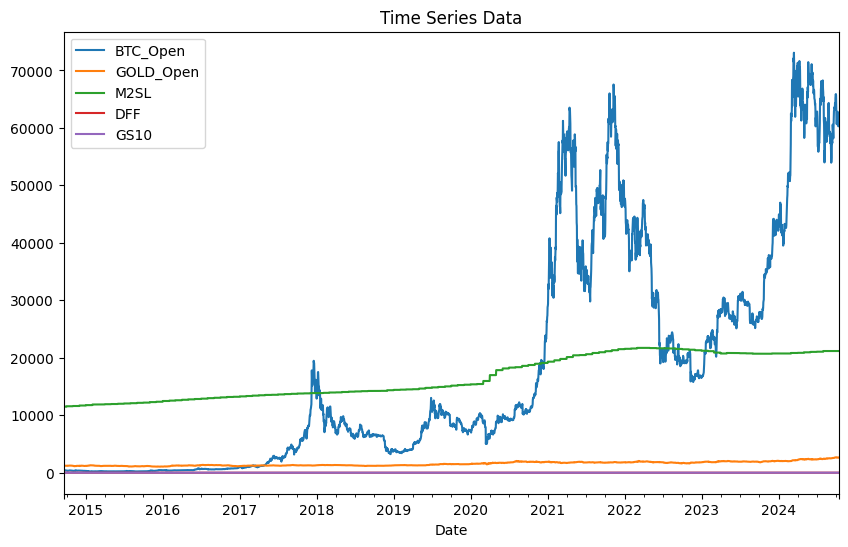

In [21]:
import matplotlib.pyplot as plt

def plot_time_series(df, columns):
    df[columns].plot(figsize=(10, 6))
    plt.title('Time Series Data')
    plt.show()

plot_time_series(cleaned_data, ['BTC_Open', 'GOLD_Open', 'M2SL', 'DFF', 'GS10'])


#### Test stationarity of the data

Stationarity is a crucial concept in time series analysis and forecasting. A stationary time series is one whose statistical properties (like mean, variance, and autocorrelation) do not change over time. Stationarity is often a prerequisite for many time series forecasting models, including ARIMA and even some LSTM implementations.

When the time series is non-stationary, it may have trends, seasonality, or other patterns that can make it hard for models to predict future values accurately. In most cases, we need to apply transformations (e.g., differencing or log transformations) to make the series stationary.

The Augmented Dickey-Fuller (ADF) test helps us check whether a time series is stationary. The test has the following hypotheses:

**Null hypothesis (H₀)**: The time series has a unit root, meaning it is non-stationary.

**Alternative hypothesis (H₁)**: The time series is stationary.
The test gives two important outputs:

**ADF Statistic**: The test statistic, which needs to be compared against critical values.

**p-value**: If the p-value is small (typically less than 0.05), we reject the null hypothesis and conclude that the series is stationary.

---

**What is Stationarity?**
Stationarity refers to a time series whose statistical properties, such as mean, variance, and autocorrelation, are constant over time. For many time series forecasting models, like ARIMA, stationarity is an important assumption.

**ADF (Augmented Dickey-Fuller) Test**
The ADF test helps check for stationarity:
- **Null Hypothesis (H₀)**: The series is non-stationary (has a unit root).
- **Alternative Hypothesis (H₁)**: The series is stationary.

If the p-value is **less than 0.05**, we reject the null hypothesis and conclude the series is stationary. If the p-value is greater, the series is non-stationary.

In our initial case, the ADF Statistic is `-0.86`, and the p-value is `0.7997`, meaning the time series is non-stationary.

**Why is Stationarity Important?**
Non-stationary time series can have trends or seasonality that make it difficult for models to forecast accurately. Common techniques to make a series stationary include differencing or log transformations.

Ref: [Dickey-Fuller Test Documentation](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)

In [22]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

check_stationarity(cleaned_data['BTC_Open'])  # Check Bitcoin Price stationarity


ADF Statistic: -0.8636078419447384
p-value: 0.7997205902629047


##### Check stationarity of opens/m2/interest/bond yields

In [29]:
# Check stationarity of different columns
columns_to_check = ['BTC_Open', 'GOLD_Open', 'M2SL', 'DFF', 'GS10']
for col in columns_to_check:
    print(f"Stationarity Check for {col}:")
    check_stationarity(cleaned_data[col])
    print("\n")


Stationarity Check for BTC_Open:
ADF Statistic: -0.8652516935613214
p-value: 0.7992001090005667


Stationarity Check for GOLD_Open:
ADF Statistic: 0.8070179070480112
p-value: 0.9917486097718042


Stationarity Check for M2SL:
ADF Statistic: -0.7152473009628064
p-value: 0.8427605151309525


Stationarity Check for DFF:
ADF Statistic: 0.15223510995346468
p-value: 0.969451710492548


Stationarity Check for GS10:
ADF Statistic: -1.0324348302664292
p-value: 0.7412514299546399




Since most of our metrics indicate they are stationary (impacted by trends cycles) as we'd expect for financial assets. We'll want to look towards different methods for forecasting. ARIMA relies on stationarity to forecast accurately, in which case we would have to apply some method of differencing etc to resolve the issue.

---

Otherwise we'll need to look for other methods like EWMA:
---

EWMA is a smoothing technique that gives exponentially decreasing weights to older data points. This means that more recent observations have a higher weight, making the model more responsive to recent trends and volatility.

**Why Use EWMA?**
- EWMA smooths data without removing long-term trends.
- It's useful for tracking recent changes while still accounting for older data.
- It's widely used in finance to measure volatility and price trends.

**Formula:**
The EWMA at time t is given by:
\\[
EWMA_t = (1 - \\alpha) \\, x_t + \\alpha \\, EWMA_{t-1}
\\]
Where:
- \\( x_t \\) is the current value,
- \\( \\alpha \\) is the smoothing factor (usually between 0 and 1).

A higher \\( \\alpha \\) gives more weight to recent values, while a lower \\( \\alpha \\) smooths the data more.

In [30]:
cleaned_data

,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume,BTC_Dividends,BTC_Stock Splits,GOLD_Open,GOLD_High,GOLD_Low,...,GOLD_Dividends,GOLD_Stock Splits,M2SL,DFF,GS10,BTC_Open_diff,GOLD_Open_diff,M2SL_diff,DFF_diff,GS10_diff
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-23,402.092010,441.557007,396.196991,435.790985,4.509950e+07,0.0,0.0,1221.000000,1221.000000,1221.000000,...,0.0,0.0,11493.7,0.09,2.53,2.992004,6.099976,0.0,0.0,0.0
2014-09-24,435.751007,436.112000,421.131989,423.204987,3.062770e+07,0.0,0.0,1218.599976,1218.599976,1216.800049,...,0.0,0.0,11493.7,0.09,2.53,33.658997,-2.400024,0.0,0.0,0.0
2014-09-25,423.156006,423.519989,409.467987,411.574005,2.681440e+07,0.0,0.0,1209.500000,1221.199951,1209.500000,...,0.0,0.0,11493.7,0.09,2.53,-12.595001,-9.099976,0.0,0.0,0.0
2014-09-26,411.428986,414.937988,400.009003,404.424988,2.146080e+07,0.0,0.0,1214.099976,1214.099976,1214.099976,...,0.0,0.0,11493.7,0.09,2.53,-11.727020,4.599976,0.0,0.0,0.0
2014-09-27,403.556000,406.622986,397.372009,399.519989,1.502930e+07,0.0,0.0,1214.099976,1214.099976,1214.099976,...,0.0,0.0,11493.7,0.09,2.53,-7.872986,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-08,62221.644531,63174.304688,61843.562500,62131.968750,2.813448e+10,0.0,0.0,2639.000000,2639.000000,2609.300049,...,0.0,0.0,21174.9,4.83,3.72,-597.464844,-9.699951,0.0,0.0,0.0
2024-10-09,62131.726562,62508.835938,60314.613281,60582.101562,2.767098e+10,0.0,0.0,2603.000000,2607.699951,2603.000000,...,0.0,0.0,21174.9,4.83,3.72,-89.917969,-36.000000,0.0,0.0,0.0
2024-10-10,60581.929688,61236.722656,58895.207031,60274.500000,3.045281e+10,0.0,0.0,2602.500000,2628.300049,2602.500000,...,0.0,0.0,21174.9,4.83,3.72,-1549.796875,-0.500000,0.0,0.0,0.0


In [31]:
# Apply EWMA to a specific column
def apply_ewma(df, column, alpha=0.3):
    df[f'{column}_ewma'] = df[column].ewm(alpha=alpha).mean()
    return df

# Apply EWMA to BTC_Open
cleaned_data = apply_ewma(cleaned_data, 'BTC_Open')

# Display first few rows to verify
cleaned_data[['BTC_Open', 'BTC_Open_ewma']].head()


,BTC_Open,BTC_Open_ewma
Date,,
2014-09-23,402.092010,402.092010
2014-09-24,435.751007,421.891420
2014-09-25,423.156006,422.468857
2014-09-26,411.428986,418.110439
2014-09-27,403.556000,412.862003


In [34]:
# Apply EWMA to other columns
columns_to_smooth = ['BTC_Open', 'GOLD_Open', 'M2SL', 'DFF', 'GS10']

for col in columns_to_smooth:
    cleaned_data = apply_ewma(cleaned_data, col)

# Display the smoothed columns
cleaned_data[[f'{col}_ewma' for col in columns_to_smooth]]


,BTC_Open_ewma,GOLD_Open_ewma,M2SL_ewma,DFF_ewma,GS10_ewma
Date,,,,,
2014-09-23,402.092010,1221.000000,11493.7,0.090000,2.53
2014-09-24,421.891420,1219.588221,11493.7,0.090000,2.53
2014-09-25,422.468857,1214.981727,11493.7,0.090000,2.53
2014-09-26,418.110439,1214.633622,11493.7,0.090000,2.53
2014-09-27,412.862003,1214.441185,11493.7,0.090000,2.53
...,...,...,...,...,...
2024-10-08,62268.921116,2648.060361,21174.9,4.830399,3.72
2024-10-09,62227.762750,2634.542253,21174.9,4.830279,3.72
2024-10-10,61734.012831,2624.929577,21174.9,4.830195,3.72


##### Compare OG data against EWMA data to visualize smoothing

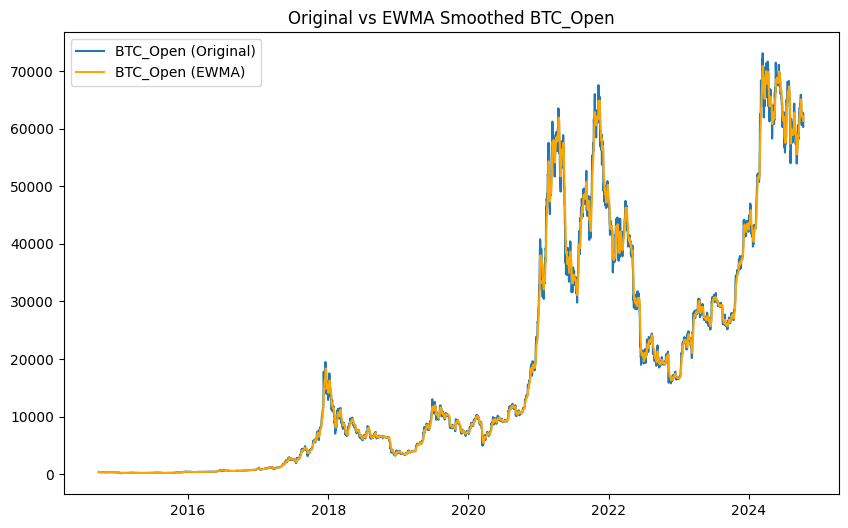

In [36]:
import matplotlib.pyplot as plt

# Updated plot function to reference index for Date
def plot_ewma_comparison(df, column):
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[column], label=f'{column} (Original)')
    plt.plot(df.index, df[f'{column}_ewma'], label=f'{column} (EWMA)', color='orange')
    plt.title(f'Original vs EWMA Smoothed {column}')
    plt.legend()
    plt.show()

# Example: Visualize BTC_Open vs BTC_Open_ewma
plot_ewma_comparison(cleaned_data, 'BTC_Open')


In [37]:
cleaned_data

,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume,BTC_Dividends,BTC_Stock Splits,GOLD_Open,GOLD_High,GOLD_Low,...,BTC_Open_diff,GOLD_Open_diff,M2SL_diff,DFF_diff,GS10_diff,BTC_Open_ewma,GOLD_Open_ewma,M2SL_ewma,DFF_ewma,GS10_ewma
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-23,402.092010,441.557007,396.196991,435.790985,4.509950e+07,0.0,0.0,1221.000000,1221.000000,1221.000000,...,2.992004,6.099976,0.0,0.0,0.0,402.092010,1221.000000,11493.7,0.090000,2.53
2014-09-24,435.751007,436.112000,421.131989,423.204987,3.062770e+07,0.0,0.0,1218.599976,1218.599976,1216.800049,...,33.658997,-2.400024,0.0,0.0,0.0,421.891420,1219.588221,11493.7,0.090000,2.53
2014-09-25,423.156006,423.519989,409.467987,411.574005,2.681440e+07,0.0,0.0,1209.500000,1221.199951,1209.500000,...,-12.595001,-9.099976,0.0,0.0,0.0,422.468857,1214.981727,11493.7,0.090000,2.53
2014-09-26,411.428986,414.937988,400.009003,404.424988,2.146080e+07,0.0,0.0,1214.099976,1214.099976,1214.099976,...,-11.727020,4.599976,0.0,0.0,0.0,418.110439,1214.633622,11493.7,0.090000,2.53
2014-09-27,403.556000,406.622986,397.372009,399.519989,1.502930e+07,0.0,0.0,1214.099976,1214.099976,1214.099976,...,-7.872986,0.000000,0.0,0.0,0.0,412.862003,1214.441185,11493.7,0.090000,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-08,62221.644531,63174.304688,61843.562500,62131.968750,2.813448e+10,0.0,0.0,2639.000000,2639.000000,2609.300049,...,-597.464844,-9.699951,0.0,0.0,0.0,62268.921116,2648.060361,21174.9,4.830399,3.72
2024-10-09,62131.726562,62508.835938,60314.613281,60582.101562,2.767098e+10,0.0,0.0,2603.000000,2607.699951,2603.000000,...,-89.917969,-36.000000,0.0,0.0,0.0,62227.762750,2634.542253,21174.9,4.830279,3.72
2024-10-10,60581.929688,61236.722656,58895.207031,60274.500000,3.045281e+10,0.0,0.0,2602.500000,2628.300049,2602.500000,...,-1549.796875,-0.500000,0.0,0.0,0.0,61734.012831,2624.929577,21174.9,4.830195,3.72


In [54]:
cleaned_data.head().to_json('cleaned_data_sample.json')

In [39]:
cleaned_data.to_csv('financial_forecasting_data_10_24.csv')

In [62]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
# univariate model if we just use the past prices of BTC
scaled_data = scaler.fit_transform(cleaned_data[['BTC_Open_ewma']])

# multivariate model
# scaled_data = scaler.fit_transform(cleaned_data[['BTC_Open_ewma', 'GOLD_Open_ewma', 'M2SL', 'DFF', 'GS10']])

# Split the scaled data into training and testing sets (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [63]:
# Function to create sequences from the time series data
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        targets.append(data[i + sequence_length])
    return np.array(sequences), np.array(targets)

# Define the sequence length (e.g., 60 time steps)
sequence_length = 60

# Create sequences for training and testing data
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


In [64]:
print(X_train, y_train)
print(X_train.shape, y_train.shape)

[[[0.00267662]
  [0.00295679]
  [0.00296496]
  ...
  [0.00241595]
  [0.00240167]
  [0.00229647]]

 [[0.00295679]
  [0.00296496]
  [0.00290329]
  ...
  [0.00240167]
  [0.00229647]
  [0.00219619]]

 [[0.00296496]
  [0.00290329]
  [0.00282902]
  ...
  [0.00229647]
  [0.00219619]
  [0.00213266]]

 ...

 [[0.32278551]
  [0.32344538]
  [0.32659001]
  ...
  [0.26939687]
  [0.27097799]
  [0.27510862]]

 [[0.32344538]
  [0.32659001]
  [0.32603793]
  ...
  [0.27097799]
  [0.27510862]
  [0.27725777]]

 [[0.32659001]
  [0.32603793]
  [0.32898578]
  ...
  [0.27510862]
  [0.27725777]
  [0.27789837]]] [[0.00219619]
 [0.00213266]
 [0.00214666]
 ...
 [0.27725777]
 [0.27789837]
 [0.27660108]]
(2878, 60, 1) (2878, 1)


## Build Neural Networks to Test Accuracy

**LSTM (Long Short-Term Memory)**: LSTM is well-known for handling long-term dependencies in time series data. It uses special gates (input, forget, output) to control the flow of information and prevent issues like vanishing gradients, which occur in standard RNNs.

**GRU (Gated Recurrent Unit)**: GRU is a simpler variant of LSTM. It combines the forget and input gates into a single update gate, making it computationally cheaper. GRU can be a strong alternative to LSTM when you don’t need the complexity of three gates.

---

**LSTM Architecture (Long Short-Term Memory):**
LSTM is a type of recurrent neural network designed to remember long-term dependencies. It uses three main gates:
- **Input Gate**: Decides how much of the current input should be added to the memory cell.
- **Forget Gate**: Determines how much of the past information should be forgotten.
- **Output Gate**: Controls the information sent to the next layer.

These gates allow LSTM to overcome issues like vanishing gradients in standard RNNs, enabling it to retain information over long sequences.

**GRU Architecture (Gated Recurrent Unit):**
GRU is a simpler and faster variant of LSTM. It merges the forget and input gates into a single **Update Gate**, simplifying the architecture. It also has:
- **Reset Gate**: Decides how much of the previous memory to forget.

GRU is computationally cheaper than LSTM and often performs similarly, especially when you don’t need to model very long dependencies.

In [49]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

#### Build LSTM

In [67]:
# Build the LSTM model
lstm_model = Sequential()

# Add LSTM layers with Dropout for regularization
lstm_model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dropout(0.2))

# Add a Dense output layer
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
lstm_model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
lstm_loss = lstm_model.evaluate(X_test, y_test)
print(f"LSTM Test Loss: {lstm_loss}")


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - loss: 0.0089 - val_loss: 0.0036
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 0.0011 - val_loss: 6.6475e-04
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 9.9788e-04 - val_loss: 0.0012
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 8.7540e-04 - val_loss: 7.6519e-04
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - loss: 8.5397e-04 - val_loss: 4.8181e-04
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - loss: 7.9968e-04 - val_loss: 4.5391e-04
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - loss: 7.9292e-04 - val_loss: 4.1053e-04
Epoch 9/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 7.3594e-04 - val_loss: 0.0016
Epoch 10/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - loss: 6.7754e-04 - val_loss: 5.3571e-04
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.5945e-04
LSTM Test Loss: 0.0005357065820

#### Build GRU

In [69]:
# Build the GRU model
gru_model = Sequential()

# Add GRU layers with Dropout for regularization
gru_model.add(GRU(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(Dropout(0.2))

gru_model.add(GRU(50, return_sequences=False))
gru_model.add(Dropout(0.2))

# Add a Dense output layer
gru_model.add(Dense(1))

# Compile the model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
gru_model.summary()

# Train the GRU model
gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
gru_loss = gru_model.evaluate(X_test, y_test)
print(f"GRU Test Loss: {gru_loss}")


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 60, 100)             │          30,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 50)                  │          22,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,751 (209.96 KB)

 Trainable params: 53,751 (209.96 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 170ms/step - loss: 0.0247 - val_loss: 4.3852e-04
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 15s 109ms/step - loss: 9.4892e-04 - val_loss: 2.4666e-04
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 9.3985e-04 - val_loss: 2.2388e-04
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 9.4704e-04 - val_loss: 0.0022
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - loss: 9.5949e-04 - val_loss: 8.7328e-04
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - loss: 7.9374e-04 - val_loss: 6.3342e-04
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - loss: 8.0110e-04 - val_loss: 1.6709e-04
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - loss: 6.3833e-04 - val_loss: 2.5508e-04
Epoch 9/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - loss: 6.1106e-04 - val_loss: 1.9548e-04
Epoch 10/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 7.3483e-04 - val_loss: 4.7537e-04
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.4543e-04
G

### Forecast using existing models

In [70]:
def forecast(model, X_test):
    # Generate predictions using the model
    predictions = model.predict(X_test)
    return predictions

forecast_lstm = forecast(lstm_model, X_test)
forecast_gru = forecast(gru_model, X_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


In [60]:
forecast_lstm

array([[0.60933214],
       [0.6085018 ],
       [0.607834  ],
       [0.60732836],
       [0.60696805],
       [0.6067209 ],
       [0.6065593 ],
       [0.60652465],
       [0.6078467 ],
       [0.60985154],
       [0.61203456],
       [0.6141096 ],
       [0.61593544],
       [0.61743116],
       [0.6186429 ],
       [0.61961734],
       [0.6203769 ],
       [0.62094545],
       [0.62135744],
       [0.62164456],
       [0.62184834],
       [0.62198424],
       [0.6220585 ],
       [0.62209934],
       [0.6221256 ],
       [0.62186784],
       [0.62140334],
       [0.62084126],
       [0.620273  ],
       [0.619778  ],
       [0.61937916],
       [0.61908525],
       [0.6188901 ],
       [0.6188126 ],
       [0.61886656],
       [0.61905247],
       [0.6193952 ],
       [0.6199435 ],
       [0.6207482 ],
       [0.6218423 ],
       [0.6231583 ],
       [0.62463164],
       [0.6261691 ],
       [0.62765837],
       [0.62905365],
       [0.63042766],
       [0.6317933 ],
       [0.633

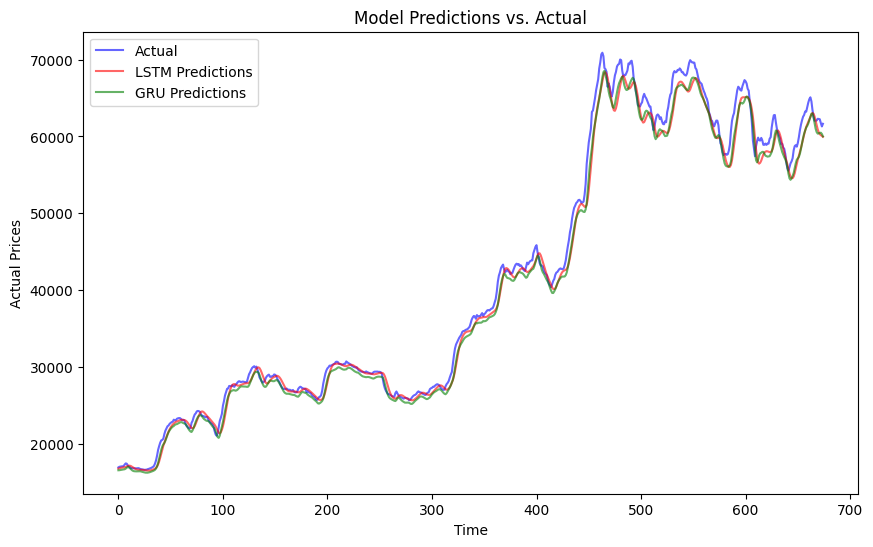

In [73]:
import matplotlib.pyplot as plt

# inverse_transform "un-normalizes" the data
# scaler.inverse_transform(data)

# scaler.inverse_transform(y_test)
# scaler.inverse_transform(forecast_lstm)
# scaler.inverse_transform(forecast_gru)

# def forecast(model, X_test):

def plot_forecasts(y_test, lstm_predictions, gru_predictions, title="Model Predictions vs. Actual"):
    plt.figure(figsize=(10, 6))
    plt.plot(scaler.inverse_transform(y_test), label='Actual', color='blue', alpha=0.6)
    plt.plot(scaler.inverse_transform(forecast_lstm), label='LSTM Predictions', color='red', alpha=0.6)
    plt.plot(scaler.inverse_transform(forecast_gru), label='GRU Predictions', color='green', alpha=0.6)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Actual Prices')
    plt.legend()
    plt.show()

# Plot the forecasts
plot_forecasts(y_test, forecast_lstm, forecast_gru, title="Model Predictions vs. Actual")

##### Try using a tuner to optimze models

Using a tuner and RandomSearch to optimize hyperparmeters for LSTM & GRU models to test/save best version of the models for further optimization.

In [76]:
from keras_tuner import RandomSearch

# Define a function to build the univariate LSTM model for tuning
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50),
                   return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units', min_value=25, max_value=100, step=25), return_sequences=False))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Use RandomSearch for hyperparameter tuning
tuner = RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=10,
    directory='lstm_tuning',
    project_name='univariate_lstm'
)
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)
best_lstm_model = tuner.get_best_models(num_models=1)[0]


Trial 10 Complete [00h 02m 34s]
val_loss: 0.00048732158029451966

Best val_loss So Far: 0.00024833521456457675
Total elapsed time: 00h 47m 31s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [77]:
best_lstm_model_loss = best_lstm_model.evaluate(X_test, y_test)
print(f"best_lstm_model_model Test Loss: {best_lstm_model_loss}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 1.4141e-04
best_lstm_model_model Test Loss: 0.00024833521456457675


### Rolling Forecast

In [85]:
def rolling_forecast(model, data, sequence_length):
    predictions = []
    for i in range(len(data) - sequence_length):
        # Use the last sequence_length days for each prediction
        sequence = data[i:i + sequence_length]
        sequence = np.expand_dims(sequence, axis=0)
        predictions.append(model.predict(sequence)[0][0])
    return predictions


real_time_forecast_lstm = rolling_forecast(lstm_model, scaled_data, sequence_length)
real_time_forecast_gru = rolling_forecast(gru_model, scaled_data, sequence_length)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 

22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


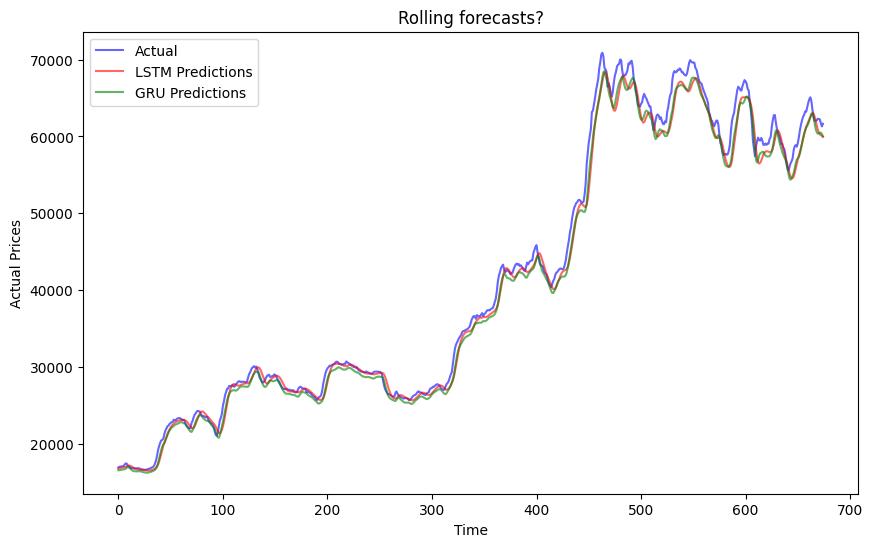

In [79]:
# def forecast(model, X_test):
forecast_best_lstm = forecast(best_lstm_model, X_test)
forecast_gru = forecast(gru_model, X_test)

# def plot_forecasts(y_test, lstm_predictions, gru_predictions, title="Model Predictions vs. Actual"):
plot_forecasts(y_test, forecast_best_lstm, forecast_gru, title="Rolling forecasts?")

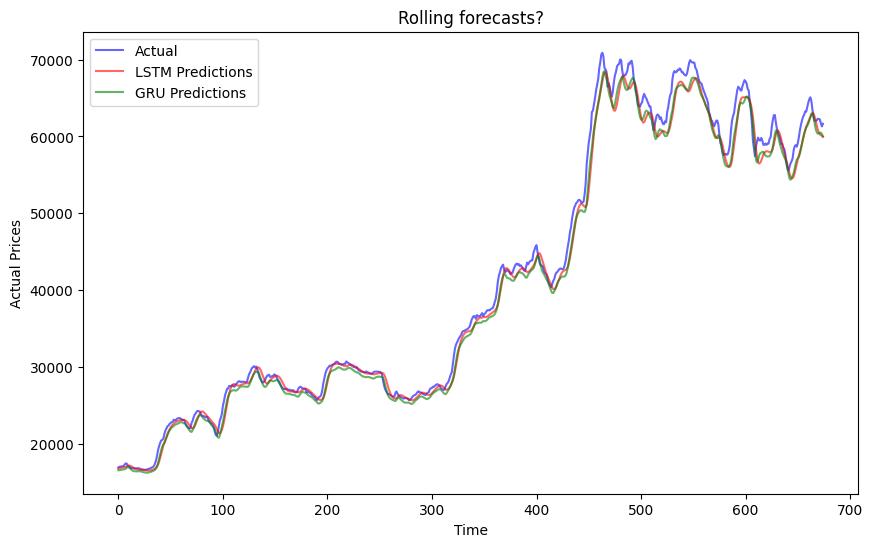

In [81]:
plot_forecasts(y_test, forecast_best_lstm, forecast_gru, title="Rolling forecasts?")

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(y_test, predictions):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
    return mae, mse, rmse


In [84]:
lstm_mae, lstm_mse, lstm_rmse = evaluate_model(y_test, forecast_lstm)
gru_mae, gru_mse, gru_rmse = evaluate_model(y_test, forecast_gru)
best_lstm_mae, best_lstm_mse, best_lstm_rmse = evaluate_model(y_test, forecast_best_lstm)


MAE: 0.01598919868778508, MSE: 0.0005357065151753492, RMSE: 0.02314533463087862
MAE: 0.017229818312087537, MSE: 0.00047536996415728164, RMSE: 0.021802980625531033
MAE: 0.011777851890181329, MSE: 0.00024833516753436054, RMSE: 0.015758653734832824


In [92]:
# def forecast_next_sequence(model, last_sequence, n_future_steps=60):
#     """
#     Predict the next n_future_steps given the last input sequence.

#     Parameters:
#         model: Trained LSTM or GRU model.
#         last_sequence: The last sequence of shape (1, 60, features) to start the prediction.
#         n_future_steps: Number of future time steps to predict.

#     Returns:
#         A list of predicted values for the next n_future_steps.
#     """
#     predictions = []
#     current_sequence = last_sequence

#     for _ in range(n_future_steps):
#         # Make a prediction for the next time step
#         predicted_value = model.predict(current_sequence)[0][0]
#         predictions.append(predicted_value)

#         # Update the current sequence by removing the first value and adding the new prediction
#         current_sequence = np.append(current_sequence[:, 1:, :], [[predicted_value]], axis=1)

#     return predictions


def forecast_next_sequence(model, last_sequence, n_future_steps=60):
    """
    Predict the next n_future_steps given the last input sequence.

    Parameters:
        model: Trained LSTM or GRU model.
        last_sequence: The last sequence of shape (1, 60, features) to start the prediction.
        n_future_steps: Number of future time steps to predict.

    Returns:
        A list of predicted values for the next n_future_steps.
    """
    predictions = []
    current_sequence = last_sequence

    for _ in range(n_future_steps):
        # Make a prediction for the next time step
        predicted_value = model.predict(current_sequence)[0][0]
        predictions.append(predicted_value)

        # Reshape the predicted value to match the input shape (1, 1, 1)
        predicted_value_reshaped = np.array(predicted_value).reshape(1, 1, 1)

        # Update the current sequence by removing the first value and adding the new prediction
        current_sequence = np.append(current_sequence[:, 1:, :], predicted_value_reshaped, axis=1)

    return predictions


In [89]:
X_test.shape

(675, 60, 1)

In [90]:
X_test

array([[[0.27514599],
        [0.27425028],
        [0.27231826],
        ...,
        [0.23672155],
        [0.23686277],
        [0.23744669]],

       [[0.27425028],
        [0.27231826],
        [0.27059927],
        ...,
        [0.23686277],
        [0.23744669],
        [0.23682747]],

       [[0.27231826],
        [0.27059927],
        [0.26983883],
        ...,
        [0.23744669],
        [0.23682747],
        [0.23802752]],

       ...,

       [[0.84370816],
        [0.83896158],
        [0.83834231],
        ...,
        [0.87839995],
        [0.87811324],
        [0.87753084]],

       [[0.83896158],
        [0.83834231],
        [0.84323576],
        ...,
        [0.87811324],
        [0.87753084],
        [0.87054411]],

       [[0.83834231],
        [0.84323576],
        [0.83868977],
        ...,
        [0.87753084],
        [0.87054411],
        [0.86435241]]])

In [96]:
# # Get the last sequence from the test set to start forecasting
# last_sequence = X_test[-1].reshape(1, X_test.shape[1], X_test.shape[2])

# # Use the best LSTM model to predict the next 60 days
# future_lstm_predictions = forecast_next_sequence(best_lstm_model, last_sequence)
# # Rescale predictions back to the original price range
# future_lstm_predictions_rescaled = scaler.inverse_transform(np.array(future_lstm_predictions).reshape(-1, 1))


# Get the last sequence from the test set to start forecasting
last_sequence = X_test[-1].reshape(1, X_test.shape[1], X_test.shape[2])

# Use the best LSTM model to predict the next 60 days
future_lstm_predictions = forecast_next_sequence(best_lstm_model, last_sequence)

# Rescale predictions back to the original price range
future_lstm_predictions_rescaled = scaler.inverse_transform(np.array(future_lstm_predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━

In [97]:
future_lstm_predictions_rescaled

array([[61417.297],
       [61313.99 ],
       [61210.863],
       [61110.293],
       [61012.98 ],
       [60918.86 ],
       [60827.594],
       [60738.793],
       [60652.027],
       [60567.082],
       [60483.754],
       [60401.902],
       [60321.508],
       [60242.45 ],
       [60164.816],
       [60088.598],
       [60013.777],
       [59940.395],
       [59868.47 ],
       [59798.   ],
       [59728.996],
       [59661.457],
       [59595.375],
       [59530.74 ],
       [59467.53 ],
       [59405.727],
       [59345.29 ],
       [59286.21 ],
       [59228.48 ],
       [59171.99 ],
       [59116.785],
       [59062.855],
       [59010.047],
       [58958.457],
       [58908.008],
       [58858.64 ],
       [58810.37 ],
       [58763.16 ],
       [58716.965],
       [58671.79 ],
       [58627.566],
       [58584.3  ],
       [58541.99 ],
       [58500.594],
       [58460.04 ],
       [58420.395],
       [58381.58 ],
       [58343.582],
       [58306.4  ],
       [58269.99 ],


In [99]:
def iterative_forecast(model, last_sequence, n_future_steps=60):
    """
    Iteratively predict the next n_future_steps given the last input sequence.

    Parameters:
        model: Trained LSTM or GRU model.
        last_sequence: The last sequence of shape (1, 60, features) to start the prediction.
        n_future_steps: Number of future time steps to predict.

    Returns:
        A list of predicted values for the next n_future_steps.
    """
    predictions = []
    current_sequence = last_sequence

    for _ in range(n_future_steps):
        # Make a prediction for the next time step
        predicted_value = model.predict(current_sequence)[0][0]
        predictions.append(predicted_value)

        # Reshape the predicted value to match the input shape (1, 1, 1)
        predicted_value_reshaped = np.array(predicted_value).reshape(1, 1, 1)

        # Update the current sequence by removing the first value and adding the new prediction
        current_sequence = np.append(current_sequence[:, 1:, :], predicted_value_reshaped, axis=1)

    return predictions


In [104]:
# Use the best LSTM model to predict the next 60 days iteratively
future_iterative_predictions = iterative_forecast(best_lstm_model, last_sequence, n_future_steps=30)

# Rescale predictions back to the original price range
future_iterative_predictions_rescaled = scaler.inverse_transform(np.array(future_iterative_predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━

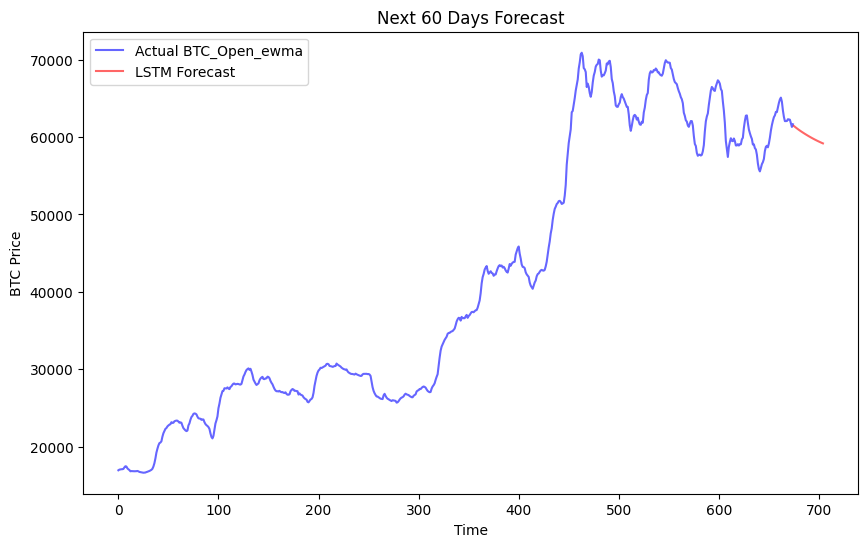

In [105]:
def plot_future_forecast(actual_data, future_predictions, title="Next 60 Days Forecast"):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(actual_data)), actual_data, label='Actual BTC_Open_ewma', color='blue', alpha=0.6)
    plt.plot(range(len(actual_data), len(actual_data) + len(future_predictions)), future_predictions, label='LSTM Forecast', color='red', alpha=0.6)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('BTC Price')
    plt.legend()
    plt.show()

# Assuming y_test is the rescaled actual values
plot_future_forecast(scaler.inverse_transform(y_test.reshape(-1, 1)), future_iterative_predictions_rescaled)


In [107]:
# Save the LSTM model
best_lstm_model.save('best_lstm_model.keras')

# Save the GRU model
gru_model.save('gru_model.keras')


## Load Saved Models

In [108]:
from tensorflow.keras.models import load_model

def load_saved_model(model_path):
    """
    Load a saved LSTM or GRU model from a specified path.

    Parameters:
        model_path: Path to the saved model file.

    Returns:
        Loaded Keras model.
    """
    return load_model(model_path)


In [ ]:
def preprocess_and_forecast(model, new_asset_data, sequence_length=60):
    """
    Preprocess new asset data and make forecasts using a saved model.

    Parameters:
        model: Trained LSTM or GRU model.
        new_asset_data: Unscaled new asset data (e.g., BTC_Open_ewma for Bitcoin).
        sequence_length: Number of time steps for creating sequences.

    Returns:
        Rescaled predictions for the next 60 days.
    """
    # Rescale new asset data using the existing scaler
    scaled_data = scaler.transform(new_asset_data.reshape(-1, 1))

    # Create sequences
    X_new, _ = create_sequences(scaled_data, sequence_length)
    last_sequence = X_new[-1].reshape(1, X_new.shape[1], X_new.shape[2])

    # Generate iterative forecasts
    future_predictions = iterative_forecast(model, last_sequence)

    # Rescale predictions back to original scale
    future_predictions_rescaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    return future_predictions_rescaled
